In [25]:
#Importing libraries

import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.linear_model import LinearRegression 

from sklearn.pipeline import Pipeline 

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

In [8]:
#Inportation des données 
data = pd.read_csv("C:/Users/DELL/Videos/ML/5G_energy_consumption_dataset.csv")

In [20]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [24]:
data_double = data.duplicated().unique()

In [26]:
data_double

array([False])

In [28]:
data.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [30]:
data.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


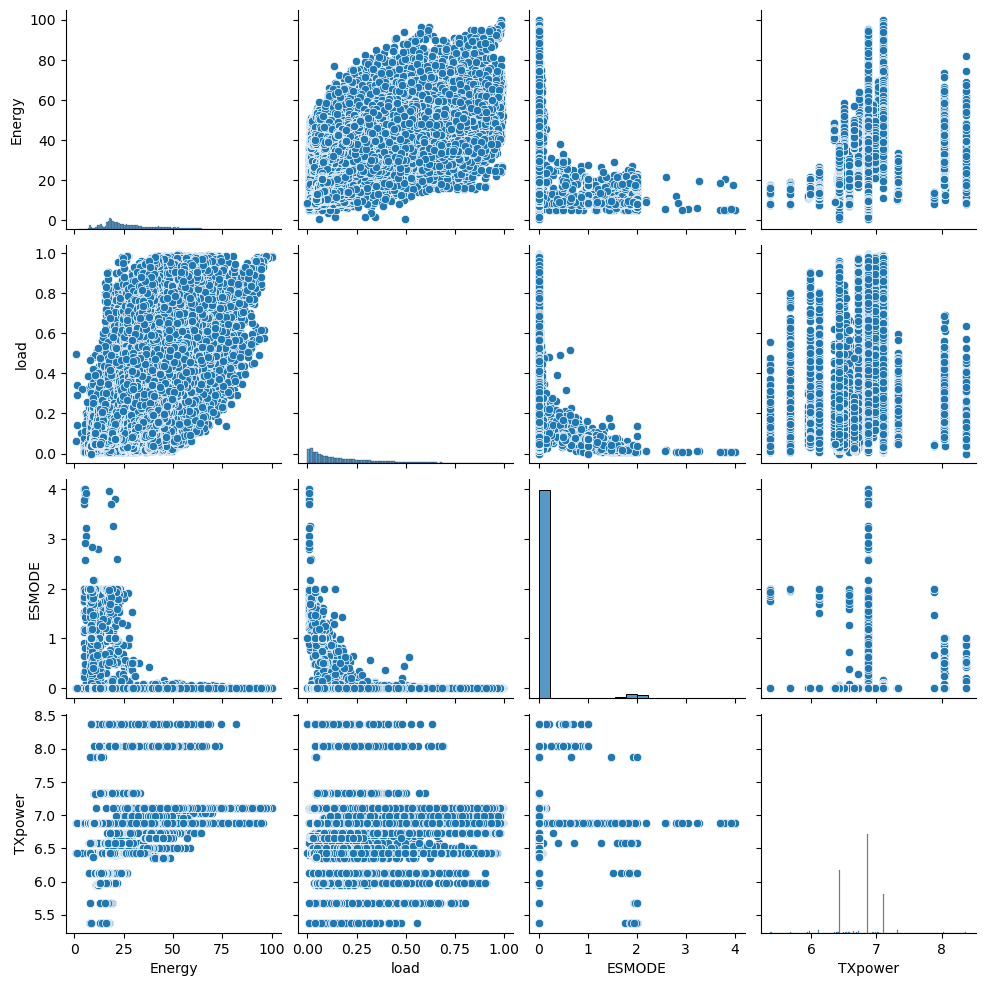

In [32]:
 sns.pairplot(data)

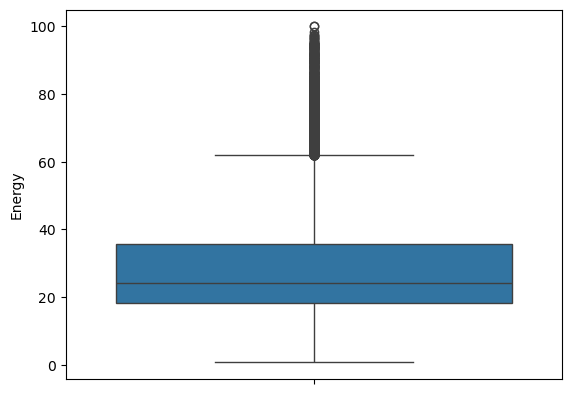

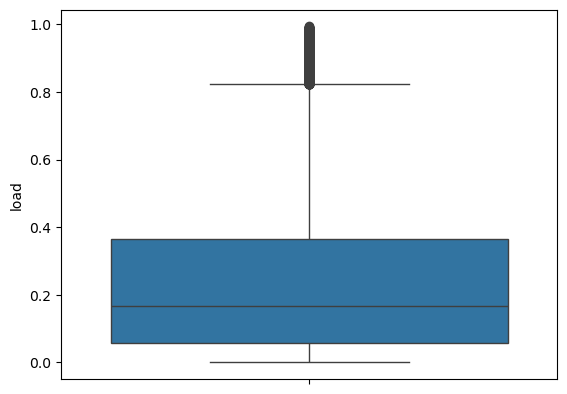

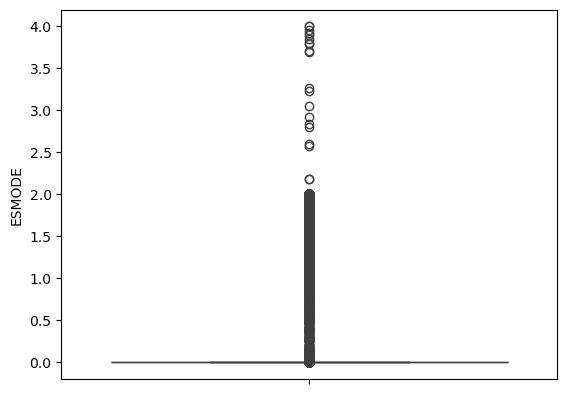

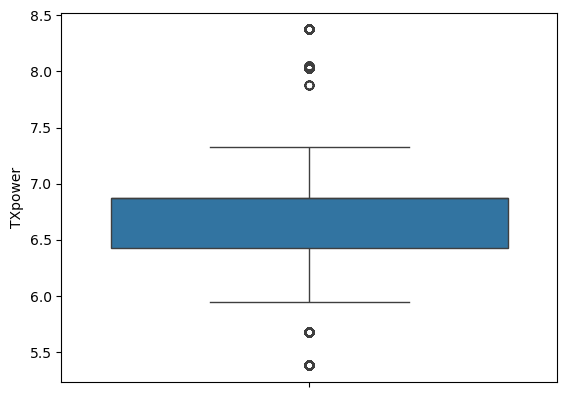

In [23]:
# boxplot
for col in data.columns:
    if data[col].dtype == 'float64':
        sns.boxplot(data[col] )
        plt.show()

In [27]:
encoding_mappings = {}
for col in data.columns:
  if data[col].dtype == 'object':
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoding_mappings = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col)

Time
BS


In [29]:
data

,Time,BS,Energy,load,ESMODE,TXpower
0,0,0,64.275037,0.487936,0.0,7.101719
1,1,0,55.904335,0.344468,0.0,7.101719
2,2,0,57.698057,0.193766,0.0,7.101719
3,3,0,55.156951,0.222383,0.0,7.101719
4,4,0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,40,10,14.648729,0.087538,0.0,7.325859
92625,41,10,14.648729,0.082635,0.0,7.325859
92626,44,10,13.452915,0.055538,0.0,7.325859
92627,45,10,13.602392,0.058077,0.0,7.325859


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
data_num = data ["Energy"], data["load"], data["ESMODE"], data["TXpower"], data ["BS"],
scaler = MinMaxScaler()
print(scaler.fit(data_num))
print(scaler.data_max_)
print(scaler.transform(data_num))

MinMaxScaler()
[64.27503737 55.90433483 57.6980568  ... 13.4529148  13.60239163
 13.30343797]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.00759138 0.00616174 0.00335828 ... 0.00412836 0.00426961 0.0036211 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.11048953 0.12703342 0.1230842  ... 0.54455556 0.53857143 0.55067416]
 [0.         0.         0.         ... 0.74333333 0.73516484 0.75168539]]


In [61]:
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [31]:
# Séparer les caractéristiques (X) et la cible (y)

x= data.drop(columns =['Time','Energy'],)


In [33]:
x

,BS,load,ESMODE,TXpower
0,0,0.487936,0.0,7.101719
1,0,0.344468,0.0,7.101719
2,0,0.193766,0.0,7.101719
3,0,0.222383,0.0,7.101719
4,0,0.175436,0.0,7.101719
...,...,...,...,...
92624,10,0.087538,0.0,7.325859
92625,10,0.082635,0.0,7.325859
92626,10,0.055538,0.0,7.325859
92627,10,0.058077,0.0,7.325859


In [35]:
y= data.drop(columns =['Time','BS','load', 'ESMODE','TXpower'])

In [231]:
y

,Energy
0,64.275037
1,55.904335
2,57.698057
3,55.156951
4,56.053812
...,...
92624,14.648729
92625,14.648729
92626,13.452915
92627,13.602392


In [41]:
# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [227]:
X_scaled

array([[ 1.036457  , -0.2128106 ,  1.0850681 ],
       [ 0.42511173, -0.2128106 ,  1.0850681 ],
       [-0.2170592 , -0.2128106 ,  1.0850681 ],
       ...,
       [-0.8060733 , -0.2128106 ,  1.8082713 ],
       [-0.79525643, -0.2128106 ,  1.8082713 ],
       [-0.83745863, -0.2128106 ,  1.8082713 ]])

In [114]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [116]:
# Pipeline pour la régression polynomiale 
model = Pipeline([ ('poly', PolynomialFeatures(degree=6)), ('linear', LinearRegression()) ])

In [118]:
# Entraîner le modèle
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6)),
                ('linear', LinearRegression())])

In [122]:
# Prédictions 
y_pred = model.predict(X_test)

In [124]:
# Évaluer le modèle 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
from sklearn.metrics import mean_squared_error

# Calcul du RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Root Mean Squared Error (RMSE): 7.4345754100049115
Mean Squared Error (MSE): 55.27291152704969
R-squared (R2): 0.7209371844652512


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


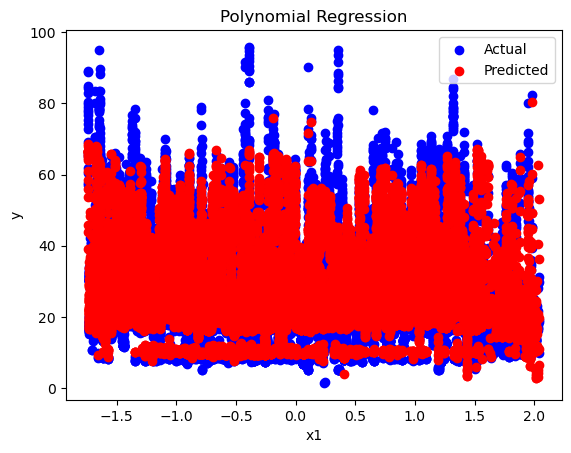

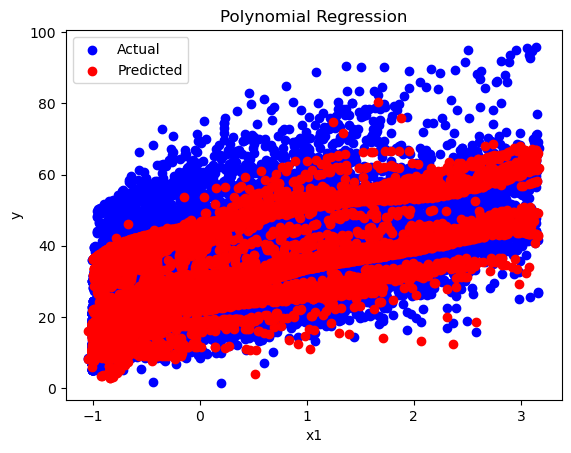

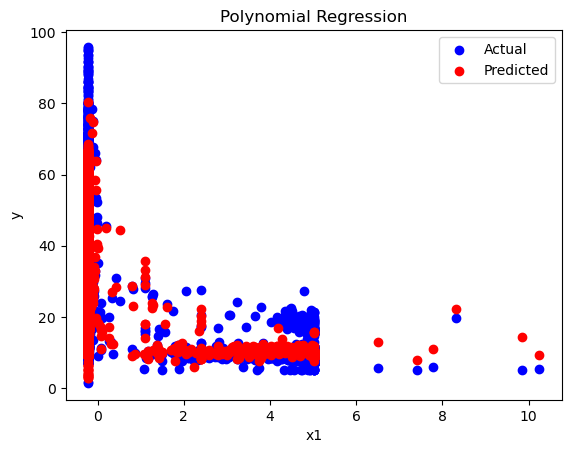

In [126]:
# Assurons-nous que X_test et y_test ont la même taille
assert len(X_test) == len(y_test), "X_test et y_test doivent avoir la même longueur."
for i in range(3):
    # Sélectionner une seule variable d'entrée pour l'axe x
    x_plot = X_test[:, i]  # Par exemple, la première colonne de X_test
    
    plt.scatter(x_plot, y_test, color='blue', label='Actual')
    plt.scatter(x_plot, y_pred, color='red', label='Predicted')
    plt.title('Polynomial Regression')
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.legend()
    plt.show()
